# Learning curve with F1 base model


In [3]:
import os
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_recall_curve, roc_curve
)
from sklearn.model_selection import learning_curve
import numpy as np

# Loading test data
X_test = joblib.load("X_test.joblib")
y_test = joblib.load("y_test.joblib")

# Loading train data
X_train = joblib.load("X_train.joblib")
y_train = joblib.load("y_train.joblib")

# Loading models from base_models directory
model_dir = "base_models"
trained_models = {}

for file in os.listdir(model_dir):
    if file.endswith(".joblib"):
        model_name = file.replace(".joblib", "")
        model_path = os.path.join(model_dir, file)
        trained_models[model_name] = joblib.load(model_path)

Generating Learning Curve for DecisionTree base model...


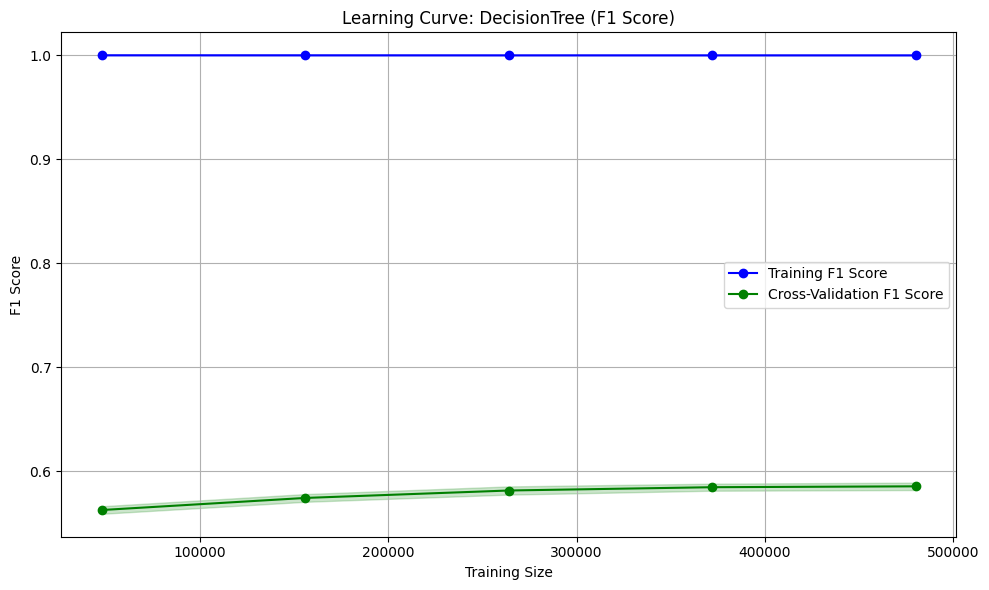

Generating Learning Curve for KNN base model...


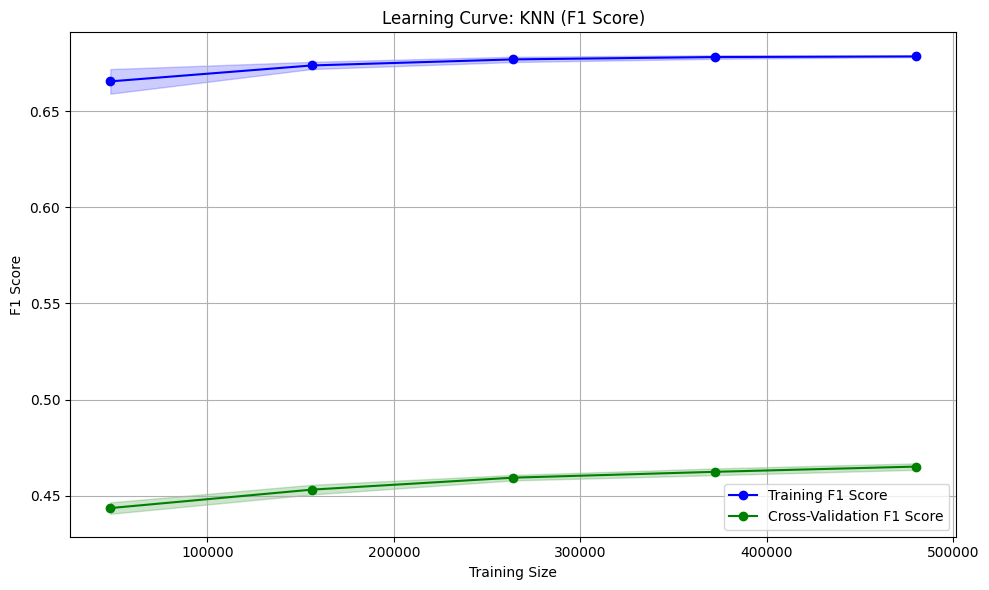

Generating Learning Curve for LinearSVC base model...


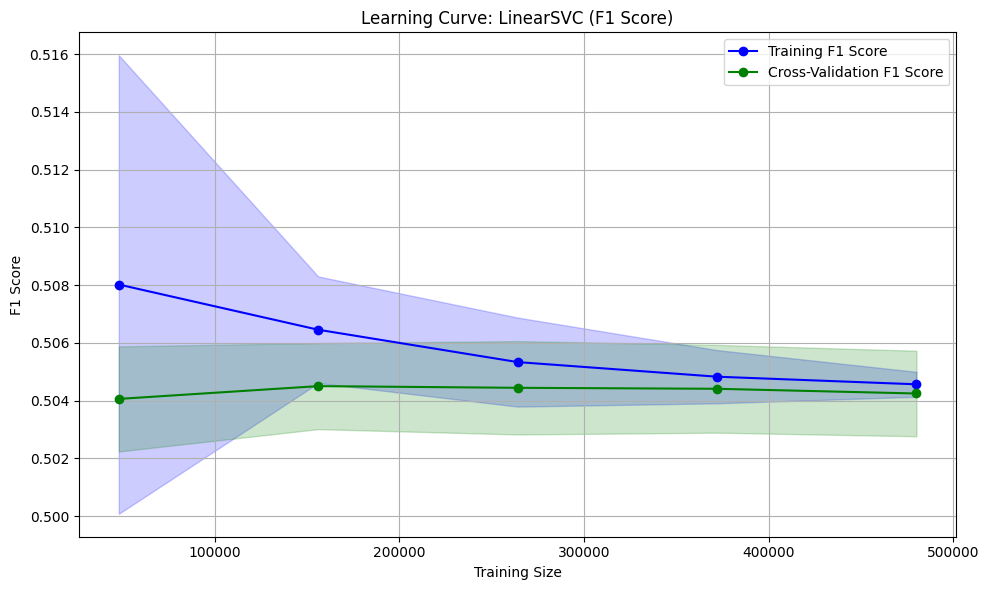

Generating Learning Curve for LogisticRegression base model...


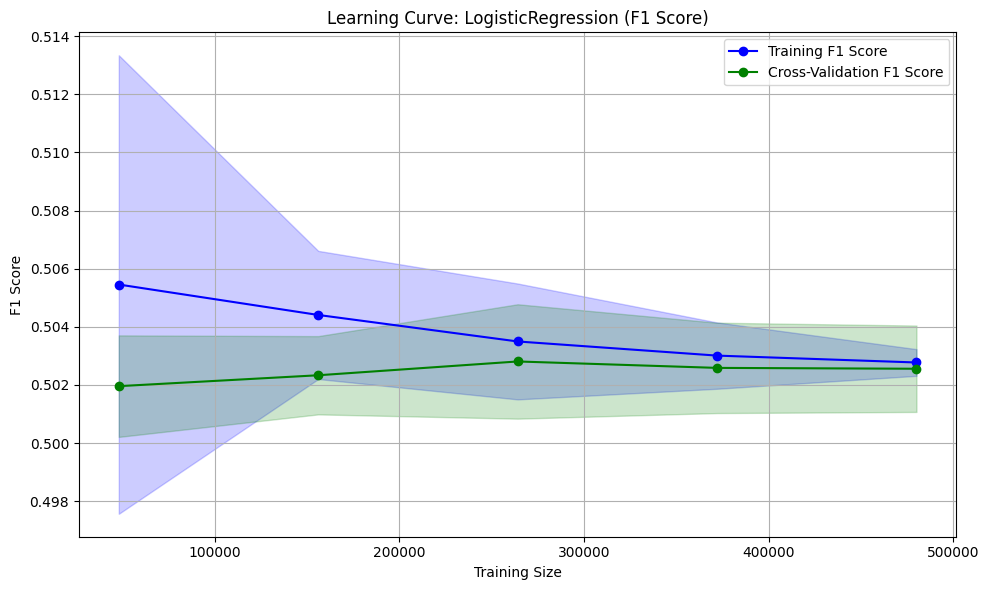

Generating Learning Curve for NaiveBayes base model...


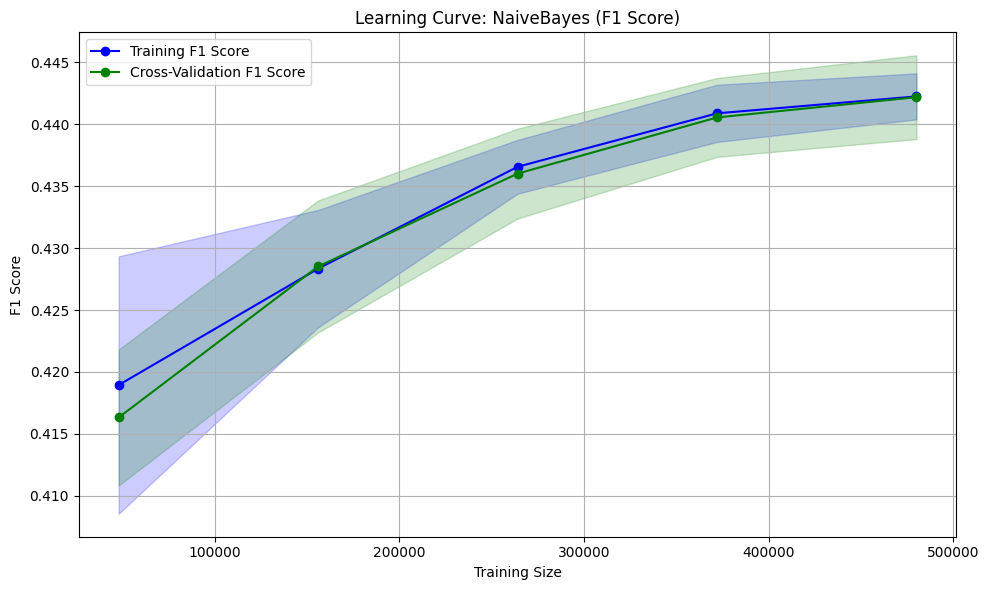

Generating Learning Curve for RandomForest base model...


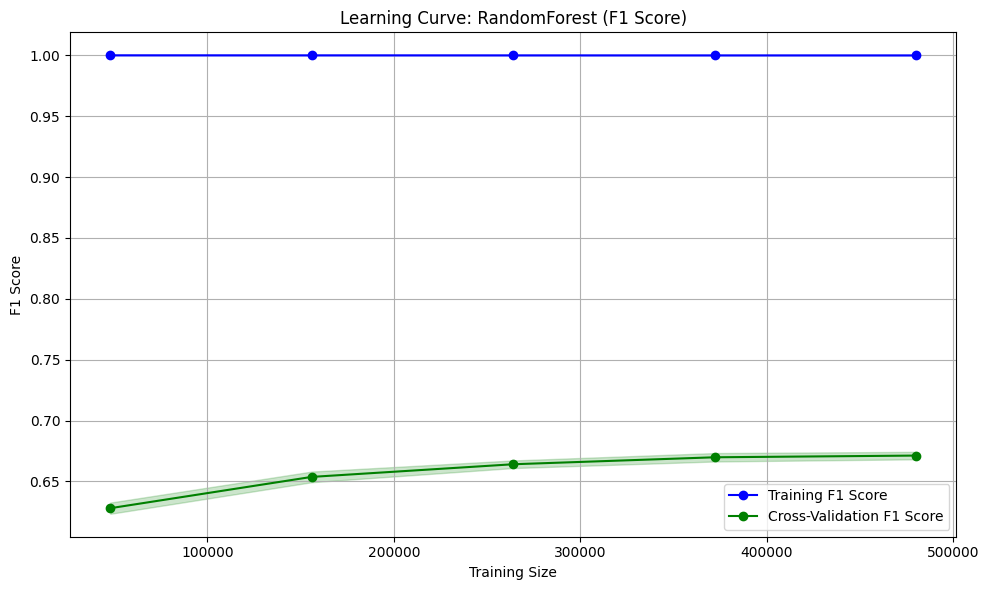

In [4]:
# Loop through each model and plot the learning curve
for model_name, model in trained_models.items():
    print(f"Generating Learning Curve for {model_name} base model...")

    # Learning Curve (F1 Score)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring='f1',
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5),
        shuffle=True,
        random_state=42
    )

    # Calculate mean and standard deviation for training and testing F1 scores
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot Learning Curve for F1 Score
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training F1 Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-Validation F1 Score')

    # Plot the standard deviation as shaded areas
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='green', alpha=0.2)

    plt.title(f"Learning Curve: {model_name} (F1 Score)")
    plt.xlabel('Training Size')
    plt.ylabel('F1 Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'base_learning_curve_{model_name}.png')   
    plt.show()